In [1]:
#Lib
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torchvision

The dataset returns four NumPy arrays:

train_images, train_labels, test_images, and test_labels.

These arrays are divided into a training set and a test set. The training set (train_images and train_labels) is used to train the model, while the test set (test_images and test_labels) is used to evaluate the model's performance.

Each image is represented as a 28x28 NumPy array, with pixel values ranging from 0 to 255. The labels are integers from 0 to 9, each corresponding to a specific class representing the digits 0 through 9:

```
Label	Class
0	0
1	1
2	2
3	3
4	4
5	5
6	6
7	7
8	8
9	9
```

Each image is paired with a corresponding label.

## STEP 2

In [2]:
# Definibg transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [3]:
# Load QMNIST dataset and preprocess
train_dataset = datasets.QMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.QMNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
training_data = DataLoader(train_dataset, batch_size=64, shuffle=True)
testing_data = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [4]:
# Displaying the dataset

def show_image(image):
    image = image / 2 + 0.5  # Unnormalize the image
    np_image = image.numpy()
    plt.imshow(np.transpose(np_image, (1, 2, 0)))
    plt.show()

# Getting a batch of training data

data_iter = iter(training_data)
images, labels = next(data_iter)

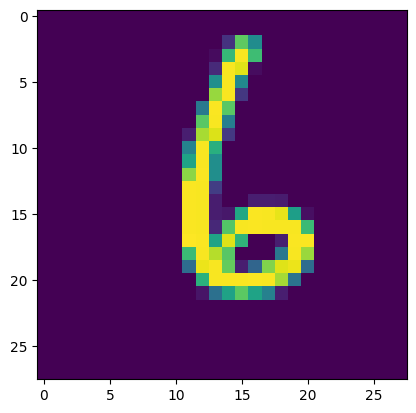

The label associated: 6


In [5]:
# Showing the first image in the batch

show_image(images[0])

# Displaying the label associated with the first image
print("The label associated:", labels[0].item())


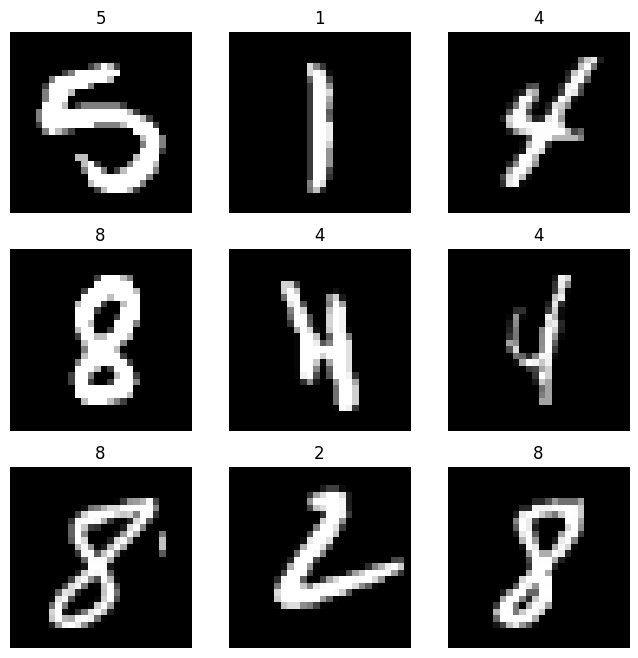

In [6]:
# Same as the ref code file

labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

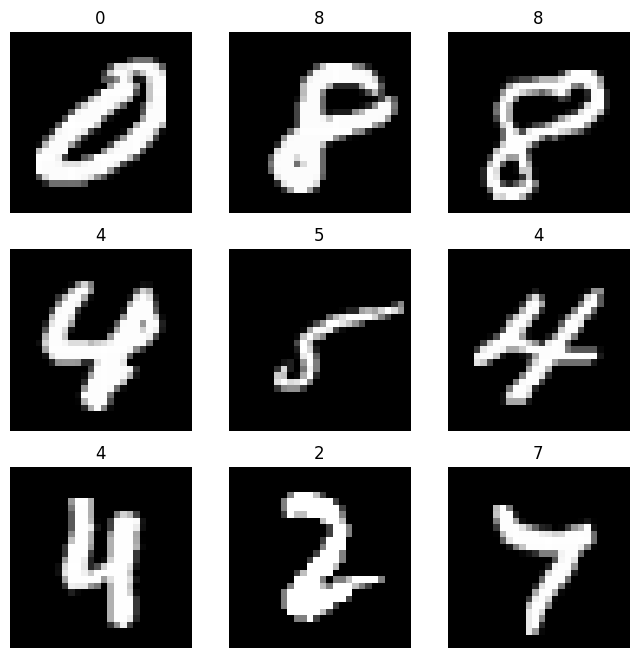

In [7]:
#Test DataSet
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):


    sample_idx = torch.randint(len(test_dataset), size=(1,)).item()
    img, label = test_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## STEP 3

In [8]:
# Defining network architecture

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = MLP() # Initializing the neural network

For experimenting with different usecases as said in step 7, let us first consider

* Loss Function : Cross Entropy
* Optimizer : Adam Optimizer






In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [10]:
# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(training_data, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted_train = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()


        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

    train_accuracy = 100 * correct_train / total_train
    print(f'Accuracy on the training set after epoch {epoch + 1}: {train_accuracy:.2f}%')

print('Finished Training')

Epoch 1, Batch 100, Loss: 0.9900067466497421
Epoch 1, Batch 200, Loss: 0.414825898706913
Epoch 1, Batch 300, Loss: 0.37200309574604035
Epoch 1, Batch 400, Loss: 0.3546118515729904
Epoch 1, Batch 500, Loss: 0.32717650666832926
Epoch 1, Batch 600, Loss: 0.30704833410680293
Epoch 1, Batch 700, Loss: 0.2814884495735168
Epoch 1, Batch 800, Loss: 0.26090227253735065
Epoch 1, Batch 900, Loss: 0.2515152434259653
Accuracy on the training set after epoch 1: 88.46%
Epoch 2, Batch 100, Loss: 0.21277012899518014
Epoch 2, Batch 200, Loss: 0.22332520149648188
Epoch 2, Batch 300, Loss: 0.20618530713021754
Epoch 2, Batch 400, Loss: 0.19184284068644047
Epoch 2, Batch 500, Loss: 0.18357726521790027
Epoch 2, Batch 600, Loss: 0.1952121341973543
Epoch 2, Batch 700, Loss: 0.1678403934650123
Epoch 2, Batch 800, Loss: 0.17978949762880803
Epoch 2, Batch 900, Loss: 0.16744696982204915
Accuracy on the training set after epoch 2: 94.22%
Epoch 3, Batch 100, Loss: 0.1549782037548721
Epoch 3, Batch 200, Loss: 0.13762

In [11]:
 # Evaluation function
model.eval()
def evaluate_model(loader):
    predictions = []
    correct = 0
    total = 0
    with torch.no_grad():
        for input_data, target_labels in loader:
            model_output = model(input_data)
            _, predicted = torch.max(model_output.data, 1)
            total += target_labels.size(0)
            correct += (predicted == target_labels).sum().item()
            predictions.extend(predicted.cpu().numpy())
    return 100 * correct / total, predictions


In [12]:
train_acc = evaluate_model(training_data)
test_acc = evaluate_model(testing_data)

print(f'Train Accuracy: {train_acc}%')
print(f'Test Accuracy: {test_acc}%')

Train Accuracy: (98.08333333333333, [6, 3, 0, 6, 2, 0, 9, 7, 8, 6, 3, 6, 4, 4, 9, 3, 3, 1, 2, 8, 2, 2, 1, 6, 3, 9, 0, 1, 5, 2, 1, 4, 0, 6, 3, 3, 8, 8, 2, 2, 7, 3, 9, 2, 4, 3, 2, 9, 9, 3, 0, 8, 5, 7, 9, 4, 2, 4, 3, 1, 0, 3, 5, 8, 8, 3, 3, 4, 3, 7, 3, 2, 5, 7, 1, 6, 1, 9, 9, 3, 7, 2, 9, 9, 8, 5, 9, 4, 3, 3, 5, 2, 9, 8, 9, 1, 0, 2, 3, 4, 3, 1, 6, 3, 3, 5, 6, 8, 4, 3, 7, 1, 3, 9, 3, 0, 8, 8, 9, 4, 5, 1, 0, 3, 9, 5, 0, 2, 8, 3, 4, 1, 3, 4, 6, 1, 3, 8, 5, 0, 7, 8, 4, 9, 5, 0, 2, 0, 1, 6, 7, 9, 5, 3, 1, 9, 7, 2, 9, 7, 3, 8, 5, 7, 8, 5, 6, 3, 4, 9, 3, 8, 4, 6, 7, 9, 8, 5, 3, 2, 7, 1, 6, 2, 2, 0, 3, 0, 1, 9, 1, 1, 1, 1, 9, 3, 6, 7, 5, 0, 4, 9, 6, 9, 1, 6, 0, 0, 1, 6, 8, 8, 7, 4, 0, 9, 4, 9, 7, 2, 8, 0, 0, 4, 5, 3, 3, 0, 2, 4, 2, 0, 4, 1, 1, 1, 3, 5, 5, 5, 3, 4, 4, 0, 4, 6, 7, 3, 0, 2, 4, 0, 5, 2, 5, 6, 9, 0, 1, 5, 9, 7, 2, 1, 1, 0, 1, 9, 1, 8, 1, 2, 2, 8, 4, 8, 0, 8, 4, 4, 0, 3, 1, 7, 1, 8, 3, 2, 0, 1, 8, 9, 0, 6, 9, 1, 5, 5, 0, 7, 1, 7, 2, 0, 3, 7, 4, 4, 8, 7, 1, 0, 8, 2, 5, 1, 9, 7, 2, 1, 6, 

The accuracy on the training set improved significantly, increasing from  88.46% after the first epoch to 98.08% by the fifth epoch. This indicates that the model has a strong learning capability and is effectively generalizing over the training data.

On the test set, the model achieved an accuracy of 96.86%, which is quite high. This suggests that the model generalizes well to new, unseen data, maintaining strong performance beyond the training set.

## STEP 4

Adding another Dense layer of 128 nodes and re-inistializing the optimizer as Adam for this usecase

In [16]:
class ModifiedMLP(nn.Module):
    def __init__(self):
        super(ModifiedMLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 128)  # Added an extra dense layer with 128 nodes
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))  # Forward pass through the extra layer
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

modified_model = ModifiedMLP()


In [17]:
# Assuming you want to use cross entropy loss
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 5
# Train the modified model
for epoch in range(num_epochs):
    for input_data, target_labels in training_data:
        optimizer.zero_grad()
        model_output = modified_model(input_data)
        current_loss = criterion(model_output, target_labels)
        current_loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {current_loss.item()}')

Epoch 1/5, Loss: 2.288292646408081
Epoch 2/5, Loss: 2.2990899085998535
Epoch 3/5, Loss: 2.2971131801605225
Epoch 4/5, Loss: 2.3244903087615967
Epoch 5/5, Loss: 2.3071165084838867


In [18]:
# Evaluate the modified model
train_acc = evaluate_model(training_data)
test_acc = evaluate_model(testing_data)

print(f'Modified Model Train Accuracy: {train_acc}%')
print(f'Modified Model Test Accuracy: {test_acc}%')

Modified Model Train Accuracy: (98.08333333333333, [1, 4, 8, 3, 3, 7, 7, 8, 4, 2, 5, 5, 3, 6, 2, 5, 1, 8, 2, 7, 8, 3, 7, 1, 0, 5, 8, 1, 5, 7, 4, 0, 5, 7, 8, 7, 3, 9, 7, 2, 5, 5, 5, 7, 9, 2, 5, 6, 1, 1, 0, 6, 4, 1, 1, 0, 0, 9, 9, 5, 6, 0, 9, 4, 4, 3, 6, 4, 4, 2, 8, 3, 9, 9, 7, 6, 8, 4, 9, 2, 7, 0, 8, 6, 9, 6, 1, 1, 0, 7, 8, 5, 3, 8, 2, 1, 3, 7, 0, 7, 5, 8, 6, 7, 6, 8, 2, 1, 6, 2, 7, 3, 0, 8, 4, 8, 3, 2, 4, 9, 9, 5, 7, 8, 8, 2, 3, 9, 4, 6, 1, 0, 8, 9, 7, 9, 2, 1, 1, 0, 9, 5, 2, 1, 5, 0, 6, 9, 8, 6, 5, 4, 0, 3, 0, 6, 6, 4, 1, 7, 9, 8, 6, 0, 0, 9, 7, 9, 1, 6, 8, 5, 7, 5, 5, 6, 6, 8, 5, 3, 1, 0, 9, 8, 3, 7, 7, 1, 1, 0, 2, 3, 6, 3, 6, 3, 5, 5, 4, 9, 0, 9, 7, 6, 2, 1, 0, 7, 8, 3, 1, 3, 2, 6, 3, 5, 6, 0, 0, 4, 9, 6, 8, 3, 6, 4, 8, 9, 7, 5, 7, 0, 9, 3, 1, 9, 8, 7, 4, 1, 7, 9, 9, 9, 8, 0, 2, 7, 7, 8, 2, 8, 5, 4, 1, 0, 9, 1, 7, 6, 3, 8, 7, 5, 8, 1, 2, 8, 0, 8, 8, 6, 0, 6, 5, 5, 9, 4, 6, 3, 9, 9, 4, 9, 5, 5, 3, 4, 1, 2, 1, 6, 1, 1, 7, 0, 3, 8, 2, 3, 4, 3, 2, 5, 7, 1, 3, 3, 0, 3, 6, 0, 5, 5, 8, 5, 

So by adding a dense layer did not affect the algorithm, it gave the same train and test accuracy.

## STEP 7

Trying different optimizers

1. SGD
2. RMSprop
3. AdamW
4. Adamgrad
5. Adadelta
6. Adamax

and Loss functions


1. NULL Loss

SGD

One potential way to inc accuracy is adding dropout and using Tanh activation

In [19]:
criterion = nn.CrossEntropyLoss()
class ExperimentMLP(nn.Module):
    def __init__(self):
        super(ExperimentMLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 128)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.tanh(self.fc1(x))
        x = self.dropout1(x)
        x = torch.tanh(self.fc2(x))
        x = self.dropout2(x)
        x = torch.tanh(self.fc3(x))
        x = self.fc4(x)
        return x

test_model = ExperimentMLP()


In [20]:
optimizer = torch.optim.SGD(modified_model.parameters(), lr=0.01)

# Train the experiment model
for epoch in range(num_epochs):
    for images, labels in training_data:
        optimizer.zero_grad()
        outputs = test_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

# Evaluate the experiment model
train_accuracy = evaluate_model(training_data)
test_accuracy = evaluate_model(testing_data)

print(f'Experiment Model Train Accuracy: {train_accuracy}%')
print(f'Experiment Model Test Accuracy: {test_accuracy}%')


Epoch 1/5, Loss: 2.3209290504455566
Epoch 2/5, Loss: 2.338484525680542
Epoch 3/5, Loss: 2.312286376953125
Epoch 4/5, Loss: 2.308471441268921
Epoch 5/5, Loss: 2.3113789558410645
Experiment Model Train Accuracy: (98.08333333333333, [6, 5, 7, 3, 0, 0, 4, 1, 4, 1, 7, 5, 8, 4, 7, 6, 8, 4, 2, 5, 5, 1, 6, 1, 1, 1, 0, 0, 3, 1, 3, 6, 4, 6, 2, 8, 1, 4, 0, 6, 1, 6, 4, 1, 0, 7, 6, 0, 0, 0, 8, 3, 0, 1, 4, 6, 4, 3, 2, 4, 6, 1, 0, 8, 2, 9, 0, 2, 1, 3, 7, 0, 3, 1, 5, 4, 6, 5, 0, 0, 1, 2, 9, 3, 9, 6, 1, 7, 0, 4, 5, 3, 7, 8, 0, 8, 9, 9, 1, 5, 4, 2, 2, 3, 7, 7, 1, 4, 0, 0, 8, 7, 3, 9, 7, 4, 0, 0, 3, 1, 0, 7, 9, 0, 0, 7, 0, 5, 0, 8, 3, 3, 8, 8, 0, 8, 7, 1, 3, 0, 2, 2, 8, 0, 9, 9, 0, 2, 7, 1, 6, 5, 1, 4, 3, 8, 5, 3, 9, 0, 2, 8, 8, 2, 3, 9, 2, 6, 0, 5, 7, 3, 5, 1, 9, 5, 7, 6, 3, 8, 8, 6, 9, 9, 0, 7, 0, 3, 1, 1, 9, 3, 4, 2, 7, 5, 0, 7, 0, 8, 8, 2, 7, 7, 3, 8, 2, 6, 9, 0, 3, 7, 3, 8, 6, 6, 4, 0, 6, 1, 6, 6, 4, 1, 3, 1, 0, 6, 0, 4, 1, 1, 9, 9, 8, 9, 3, 1, 7, 8, 0, 1, 2, 3, 6, 1, 8, 9, 1, 6, 1, 4, 3, 5, 4, 0, 9

RMSprop optimizer

In [21]:
# Using RMSprop optimizer
optimizer_rmsprop = torch.optim.RMSprop(test_model.parameters(), lr=0.001)

# Train the model
for epoch in range(num_epochs):
    for input_data, target_labels in training_data:
        optimizer_rmsprop.zero_grad()
        model_output = test_model(input_data)
        current_loss = criterion(model_output, target_labels)
        current_loss.backward()
        optimizer_rmsprop.step()
    print(f'RMSprop - Epoch {epoch+1}/{num_epochs}, Loss: {current_loss.item()}')

# Evaluate the model
train_acc_rmsprop = evaluate_model(training_data)
test_acc_rmsprop = evaluate_model(testing_data)

print(f'RMSprop Train Accuracy: {train_acc_rmsprop}%')
print(f'RMSprop Test Accuracy: {test_acc_rmsprop}%')


RMSprop - Epoch 1/5, Loss: 0.1473374217748642
RMSprop - Epoch 2/5, Loss: 0.04340216889977455
RMSprop - Epoch 3/5, Loss: 0.10304290056228638
RMSprop - Epoch 4/5, Loss: 0.1887730211019516
RMSprop - Epoch 5/5, Loss: 0.17930039763450623
RMSprop Train Accuracy: (98.08333333333333, [7, 1, 3, 9, 3, 8, 1, 7, 8, 9, 6, 6, 1, 1, 4, 1, 2, 7, 7, 6, 4, 4, 3, 6, 3, 0, 2, 6, 3, 4, 9, 9, 0, 9, 0, 0, 5, 0, 6, 8, 6, 3, 8, 0, 5, 5, 5, 2, 8, 8, 4, 0, 8, 9, 3, 8, 7, 0, 0, 4, 0, 6, 7, 5, 6, 6, 2, 1, 3, 7, 1, 7, 7, 6, 0, 8, 4, 1, 7, 0, 6, 7, 1, 9, 8, 7, 4, 8, 7, 4, 2, 9, 9, 3, 5, 7, 8, 7, 5, 1, 8, 6, 4, 0, 9, 6, 1, 4, 5, 3, 5, 2, 2, 9, 9, 0, 8, 9, 4, 3, 0, 1, 7, 8, 7, 8, 4, 4, 0, 3, 3, 0, 6, 6, 8, 9, 0, 9, 9, 8, 2, 3, 8, 0, 6, 2, 1, 6, 8, 3, 1, 3, 1, 1, 1, 4, 1, 7, 6, 8, 5, 2, 8, 3, 2, 3, 2, 6, 3, 4, 8, 9, 3, 4, 4, 1, 4, 6, 1, 0, 4, 3, 5, 8, 1, 9, 4, 2, 1, 8, 4, 1, 2, 7, 4, 7, 2, 9, 3, 2, 0, 8, 0, 6, 2, 3, 0, 1, 5, 9, 2, 5, 1, 7, 2, 2, 8, 3, 0, 2, 8, 5, 5, 1, 7, 6, 9, 2, 8, 0, 2, 9, 0, 8, 6, 8, 0, 0, 9, 7, 1,

AdamW Optimizer

In [22]:
# Using AdamW optimizer
adam_optimizerw = torch.optim.AdamW(test_model.parameters(), lr=0.001)

# Train the model
for epoch in range(num_epochs):
    for input_data, target_labels in training_data:
        optimizer_rmsprop.zero_grad()
        model_output = test_model(input_data)
        current_loss = criterion(model_output, target_labels)
        current_loss.backward()
        optimizer_rmsprop.step()
    print(f'AdamW - Epoch {epoch+1}/{num_epochs}, Loss: {current_loss.item()}')

# Evaluate the model
train_acc_adamw = evaluate_model(training_data)
test_acc_adamw = evaluate_model(testing_data)

print(f'AdamW Train Accuracy: {train_acc_adamw}%')
print(f'AdamW Test Accuracy: {test_acc_adamw}%')


AdamW - Epoch 1/5, Loss: 0.03465375676751137
AdamW - Epoch 2/5, Loss: 0.10937071591615677
AdamW - Epoch 3/5, Loss: 0.10037440061569214
AdamW - Epoch 4/5, Loss: 0.03287230059504509
AdamW - Epoch 5/5, Loss: 0.09396035224199295
AdamW Train Accuracy: (98.08333333333333, [3, 0, 1, 1, 9, 5, 8, 4, 8, 5, 9, 8, 9, 6, 7, 1, 0, 8, 4, 6, 0, 2, 9, 0, 0, 3, 5, 7, 5, 9, 9, 0, 6, 4, 8, 4, 9, 8, 8, 9, 7, 9, 0, 6, 0, 1, 9, 5, 1, 6, 5, 4, 7, 6, 4, 1, 8, 5, 4, 3, 8, 5, 1, 9, 6, 8, 9, 1, 2, 9, 4, 8, 5, 6, 2, 5, 4, 6, 7, 0, 7, 9, 5, 0, 6, 0, 1, 2, 2, 6, 7, 1, 6, 7, 6, 2, 3, 4, 7, 5, 8, 4, 9, 0, 6, 1, 6, 1, 1, 9, 7, 5, 0, 1, 5, 8, 4, 8, 6, 9, 5, 5, 7, 5, 8, 2, 3, 1, 9, 5, 2, 5, 4, 2, 2, 0, 4, 9, 1, 5, 7, 6, 7, 5, 3, 5, 5, 2, 1, 2, 0, 6, 2, 7, 2, 3, 0, 8, 4, 7, 0, 9, 0, 5, 2, 2, 0, 2, 6, 0, 5, 4, 7, 6, 9, 8, 8, 1, 7, 9, 6, 4, 9, 8, 3, 1, 1, 5, 9, 6, 7, 2, 8, 2, 6, 9, 3, 6, 7, 9, 3, 1, 1, 8, 2, 4, 0, 1, 0, 6, 7, 9, 0, 3, 1, 6, 7, 4, 6, 5, 4, 3, 9, 2, 1, 1, 3, 9, 8, 2, 0, 8, 0, 8, 8, 6, 9, 9, 2, 4, 3, 8, 1, 8, 

Adagrad Optimizer

In [23]:
# Using Adagrad optimizer
optimizer_adagrad = torch.optim.Adagrad(test_model.parameters(), lr=0.001)

# Train the model
for epoch in range(num_epochs):
    for input_data, target_labels in training_data:
        optimizer_rmsprop.zero_grad()
        model_output = test_model(input_data)
        current_loss = criterion(model_output, target_labels)
        current_loss.backward()
        optimizer_rmsprop.step()
    print(f'Adagrad - Epoch {epoch+1}/{num_epochs}, Loss: {current_loss.item()}')

# Evaluate the model
train_acc_adagrad = evaluate_model(training_data)
test_acc_adagrad = evaluate_model(testing_data)

print(f'Adagrad Train Accuracy: {train_acc_adagrad}%')
print(f'Adagrad Test Accuracy: {test_acc_adagrad}%')


Adagrad - Epoch 1/5, Loss: 0.041001126170158386
Adagrad - Epoch 2/5, Loss: 0.09869910776615143
Adagrad - Epoch 3/5, Loss: 0.258425772190094
Adagrad - Epoch 4/5, Loss: 0.1386893093585968
Adagrad - Epoch 5/5, Loss: 0.27912506461143494
Adagrad Train Accuracy: (98.08333333333333, [7, 0, 9, 2, 7, 8, 7, 7, 3, 8, 1, 5, 5, 3, 2, 5, 9, 9, 8, 1, 0, 1, 1, 2, 1, 5, 2, 2, 4, 0, 8, 2, 1, 3, 4, 1, 9, 7, 4, 6, 6, 5, 0, 9, 7, 1, 6, 0, 9, 2, 0, 5, 7, 2, 3, 7, 1, 3, 0, 7, 7, 1, 1, 4, 5, 8, 1, 2, 8, 5, 7, 2, 8, 4, 2, 6, 2, 1, 8, 0, 0, 8, 8, 2, 1, 6, 6, 0, 0, 7, 1, 1, 3, 1, 5, 9, 7, 0, 3, 2, 5, 4, 3, 5, 9, 9, 2, 4, 1, 4, 3, 7, 1, 3, 5, 5, 3, 5, 9, 5, 9, 0, 8, 9, 4, 7, 2, 4, 7, 7, 6, 1, 4, 1, 8, 1, 9, 3, 8, 0, 1, 8, 7, 2, 9, 0, 2, 8, 5, 9, 6, 2, 1, 7, 6, 3, 5, 1, 2, 9, 6, 8, 8, 9, 4, 5, 3, 3, 3, 0, 0, 8, 1, 3, 8, 5, 9, 6, 4, 8, 0, 4, 2, 4, 6, 8, 1, 6, 3, 5, 3, 1, 4, 4, 5, 4, 9, 6, 1, 3, 9, 9, 5, 0, 1, 5, 5, 5, 4, 5, 1, 5, 1, 5, 5, 3, 2, 1, 2, 2, 0, 8, 7, 4, 7, 8, 8, 3, 6, 7, 6, 3, 9, 4, 4, 8, 8, 1, 9, 6, 0,

Adadelta Optimizer

In [24]:
# Using Adadelta optimizer
optimizer_adadelta = torch.optim.Adadelta(test_model.parameters(), lr=1.0)  # Note: Adadelta typically uses a higher learning rate

# Train the model
for epoch in range(num_epochs):
    for input_data, target_labels in training_data:
        optimizer_rmsprop.zero_grad()
        model_output = test_model(input_data)
        current_loss = criterion(model_output, target_labels)
        current_loss.backward()
        optimizer_rmsprop.step()
    print(f'Adadelta - Epoch {epoch+1}/{num_epochs}, Loss: {current_loss.item()}')

# Evaluate the model
train_acc_adadelta = evaluate_model(training_data)
test_acc_adadelta = evaluate_model(testing_data)

print(f'Adadelta Train Accuracy: {train_acc_adadelta}%')
print(f'Adadelta Test Accuracy: {test_acc_adadelta}%')


Adadelta - Epoch 1/5, Loss: 0.205203115940094
Adadelta - Epoch 2/5, Loss: 0.050979405641555786
Adadelta - Epoch 3/5, Loss: 0.20709338784217834
Adadelta - Epoch 4/5, Loss: 0.05644511803984642
Adadelta - Epoch 5/5, Loss: 0.1985040009021759
Adadelta Train Accuracy: (98.08333333333333, [6, 0, 7, 4, 1, 8, 6, 8, 9, 5, 8, 1, 3, 3, 6, 2, 5, 0, 1, 3, 0, 9, 5, 3, 8, 0, 8, 6, 0, 5, 0, 4, 1, 4, 0, 0, 8, 4, 5, 1, 1, 8, 0, 3, 2, 8, 0, 4, 8, 0, 5, 9, 2, 6, 1, 0, 1, 3, 4, 3, 0, 3, 9, 5, 4, 0, 9, 9, 2, 6, 3, 8, 0, 4, 0, 0, 0, 7, 0, 8, 0, 2, 3, 0, 0, 4, 3, 0, 6, 1, 1, 9, 1, 8, 8, 4, 7, 3, 1, 1, 6, 2, 4, 7, 4, 6, 0, 0, 2, 2, 8, 3, 3, 2, 4, 9, 1, 8, 5, 6, 9, 1, 1, 9, 3, 3, 7, 5, 7, 2, 6, 9, 3, 1, 1, 1, 8, 7, 4, 2, 0, 0, 5, 2, 2, 5, 1, 9, 8, 3, 8, 5, 4, 3, 2, 9, 1, 4, 8, 1, 4, 6, 1, 0, 1, 0, 9, 5, 7, 8, 4, 7, 5, 2, 6, 1, 6, 3, 3, 6, 1, 9, 4, 2, 3, 3, 0, 7, 5, 2, 4, 7, 0, 1, 4, 8, 8, 3, 7, 1, 1, 7, 9, 6, 7, 0, 6, 9, 9, 0, 6, 2, 7, 2, 3, 4, 1, 1, 7, 0, 9, 7, 1, 1, 7, 9, 1, 3, 6, 6, 5, 9, 0, 7, 6, 2, 5, 7, 0,

Trying with different loss functions, dropout, and activation functions with Adam optimizer


In [26]:
# Re-initialize the experiment model with Adam optimizer
test_model = ExperimentMLP()
optimizer = torch.optim.Adam(test_model.parameters(), lr=0.001)

current_loss_fn = nn.NLLLoss()  # Negative Log-Likelihood Loss

# Train the model
for epoch in range(num_epochs):
    for input_data, target_labels in training_data:
        optimizer.zero_grad()
        model_output = test_model(input_data)
        current_loss = current_loss_fn(model_output, target_labels)
        current_loss.backward()
        optimizer.step()
    print(f'Adam with {current_loss_fn.__class__.__name__} - Epoch {epoch+1}/{num_epochs}, Loss: {current_loss.item()}')

# Evaluate the model
train_acc = evaluate_model(training_data)
test_acc = evaluate_model(testing_data)

print(f'Adam with {current_loss_fn.__class__.__name__} Train Accuracy: {train_acc}%')
print(f'Adam with {current_loss_fn.__class__.__name__} Test Accuracy: {test_acc}%')

Adam with NLLLoss - Epoch 1/5, Loss: -59.36994171142578
Adam with NLLLoss - Epoch 2/5, Loss: -116.3979721069336
Adam with NLLLoss - Epoch 3/5, Loss: -173.99539184570312
Adam with NLLLoss - Epoch 4/5, Loss: -230.7495574951172
Adam with NLLLoss - Epoch 5/5, Loss: -288.0198669433594
Adam with NLLLoss Train Accuracy: (98.08333333333333, [2, 3, 7, 3, 7, 9, 2, 4, 7, 2, 8, 6, 0, 7, 0, 7, 6, 5, 8, 7, 5, 7, 8, 9, 2, 3, 1, 3, 9, 3, 7, 9, 8, 3, 2, 2, 9, 0, 9, 6, 7, 5, 7, 5, 3, 5, 7, 2, 9, 7, 7, 4, 8, 8, 8, 0, 4, 0, 6, 7, 6, 6, 1, 0, 0, 4, 7, 2, 3, 2, 2, 4, 5, 9, 9, 3, 2, 9, 3, 0, 7, 6, 1, 4, 4, 7, 2, 8, 3, 5, 5, 3, 8, 9, 3, 5, 6, 8, 2, 2, 6, 4, 6, 0, 7, 3, 1, 1, 0, 1, 4, 6, 9, 6, 9, 9, 8, 5, 7, 4, 3, 7, 7, 4, 1, 1, 9, 6, 8, 5, 7, 8, 6, 6, 1, 7, 2, 3, 0, 1, 4, 9, 0, 3, 0, 6, 0, 1, 3, 5, 7, 7, 7, 3, 8, 3, 6, 8, 3, 7, 3, 0, 0, 7, 2, 8, 4, 7, 7, 5, 7, 9, 9, 8, 6, 2, 1, 6, 0, 0, 3, 8, 0, 0, 7, 7, 3, 0, 0, 2, 1, 5, 8, 1, 6, 6, 7, 3, 8, 9, 6, 9, 6, 9, 9, 7, 2, 9, 7, 8, 2, 0, 6, 9, 0, 7, 6, 5, 7, 8, 4, 2

As there is no change in training and validation, there may be a chance that the network might has reached the global minima at early stages

I tried by adding the following hypothesis

My hypothesis is

The accuracy before and after the dense layer does not change, this maybe due to


1. Lower Learning rate

--> Adjustment - Reduced from 0.001 to
0.0005

2. Chances of Overfitting

--> Adjustment - Added a dropout layer after the first and second fully connected layers with a 25% dropout rate.

3. Low epoch count

--> Inc to 10


But still the model performed really bad by giving an accuracy of 9% hence did not include it as it effected the next cells